In [1]:
pip install -q pytorch_tabular

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import random
from sklearn.ensemble import RandomForestRegressor
from pandas import DataFrame

In [3]:
df=pd.read_csv('risk_factors_cervical_cancerson.csv')
pd.set_option('display.max_columns',None)

In [4]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [5]:
df.head(300)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,34,1,26,3,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,0,0,0,0,0,0,0,0
1,16,1,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,0,0,0,0,0,0,0,0
2,19,3,15,1,0,0,0,1,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,0,0,0,0,0,0,0,0
3,22,2,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,0,0,0,0,0,0,0,0
4,27,2,17,4,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,23,1,18,5,0,0,0,1,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,0,0,0,0,0,0,0,0
296,21,1,17,2,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,0,0,0,0,1,1,0,1
297,21,2,18,3,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,1,0,1,1,1,1,0,1
298,41,3,19,2,0,0,0,1,4,1,5,1,2,1,0,0,1,0,0,0,0,0,0,0,0,1,22,22,0,0,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 306 non-null    int64 
 1   Number of sexual partners           306 non-null    object
 2   First sexual intercourse            306 non-null    int64 
 3   Num of pregnancies                  306 non-null    object
 4   Smokes                              306 non-null    object
 5   Smokes (years)                      306 non-null    object
 6   Smokes (packs/year)                 306 non-null    object
 7   Hormonal Contraceptives             306 non-null    object
 8   Hormonal Contraceptives (years)     306 non-null    object
 9   IUD                                 306 non-null    object
 10  IUD (years)                         306 non-null    object
 11  STDs                                306 non-null    object

In [7]:
df=df.replace('?',np.nan)

In [8]:
df.describe()

,Age,First sexual intercourse,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,27.026144,16.928105,0.124183,0.035948,0.016340,0.035948,0.045752,0.114379,0.241830,0.143791,0.179739
std,9.827661,2.710283,0.367896,0.186465,0.126987,0.186465,0.209288,0.318792,0.428893,0.351452,0.384598
min,13.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.750000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,29.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
len(df)

306

In [10]:
df.isnull().sum()/len(df)

Age                                   0.000000
Number of sexual partners             0.029412
First sexual intercourse              0.000000
Num of pregnancies                    0.081699
Smokes                                0.013072
Smokes (years)                        0.013072
Smokes (packs/year)                   0.013072
Hormonal Contraceptives               0.098039
Hormonal Contraceptives (years)       0.098039
IUD                                   0.114379
IUD (years)                           0.114379
STDs                                  0.111111
STDs (number)                         0.111111
STDs:condylomatosis                   0.111111
STDs:cervical condylomatosis          0.111111
STDs:vaginal condylomatosis           0.111111
STDs:vulvo-perineal condylomatosis    0.111111
STDs:syphilis                         0.111111
STDs:pelvic inflammatory disease      0.111111
STDs:genital herpes                   0.111111
STDs:molluscum contagiosum            0.111111
STDs:AIDS    

In [11]:
df.isnull().sum()

Age                                     0
Number of sexual partners               9
First sexual intercourse                0
Num of pregnancies                     25
Smokes                                  4
Smokes (years)                          4
Smokes (packs/year)                     4
Hormonal Contraceptives                30
Hormonal Contraceptives (years)        30
IUD                                    35
IUD (years)                            35
STDs                                   34
STDs (number)                          34
STDs:condylomatosis                    34
STDs:cervical condylomatosis           34
STDs:vaginal condylomatosis            34
STDs:vulvo-perineal condylomatosis     34
STDs:syphilis                          34
STDs:pelvic inflammatory disease       34
STDs:genital herpes                    34
STDs:molluscum contagiosum             34
STDs:AIDS                              34
STDs:HIV                               34
STDs:Hepatitis B                  

In [12]:
df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],axis=1,inplace=True)

In [13]:
df.head(20)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,34,1,26,3,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,16,1,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19,3,15,1,0,0,0,1,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,22,2,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,27,2,17,4,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,40,3,15,3,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,21,5,14,2,1,2,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,15,1,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,15,1,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,30,5,16,4,0,0,0,0,0,1,7,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [14]:
df=df.apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 306 non-null    int64  
 1   Number of sexual partners           297 non-null    float64
 2   First sexual intercourse            306 non-null    int64  
 3   Num of pregnancies                  281 non-null    float64
 4   Smokes                              302 non-null    float64
 5   Smokes (years)                      302 non-null    float64
 6   Smokes (packs/year)                 302 non-null    float64
 7   Hormonal Contraceptives             276 non-null    float64
 8   Hormonal Contraceptives (years)     276 non-null    float64
 9   IUD                                 271 non-null    float64
 10  IUD (years)                         271 non-null    float64
 11  STDs                                272 non-n

In [15]:
df.isnull().sum()

Age                                    0
Number of sexual partners              9
First sexual intercourse               0
Num of pregnancies                    25
Smokes                                 4
Smokes (years)                         4
Smokes (packs/year)                    4
Hormonal Contraceptives               30
Hormonal Contraceptives (years)       30
IUD                                   35
IUD (years)                           35
STDs                                  34
STDs (number)                         34
STDs:condylomatosis                   34
STDs:cervical condylomatosis          34
STDs:vaginal condylomatosis           34
STDs:vulvo-perineal condylomatosis    34
STDs:syphilis                         34
STDs:pelvic inflammatory disease      34
STDs:genital herpes                   34
STDs:molluscum contagiosum            34
STDs:AIDS                             34
STDs:HIV                              34
STDs:Hepatitis B                      34
STDs:HPV        

In [16]:
df=df.drop_duplicates()

In [17]:
df.value_counts()

Age  Number of sexual partners  First sexual intercourse  Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  IUD (years)  STDs  STDs (number)  STDs:condylomatosis  STDs:cervical condylomatosis  STDs:vaginal condylomatosis  STDs:vulvo-perineal condylomatosis  STDs:syphilis  STDs:pelvic inflammatory disease  STDs:genital herpes  STDs:molluscum contagiosum  STDs:AIDS  STDs:HIV  STDs:Hepatitis B  STDs:HPV  STDs: Number of diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Hinselmann  Schiller  Citology  Biopsy
13   1.0                        13                        0.0                 0.0     0.0             0.000000             0.0                      0.00                             0.0  0.0          0.0   0.0            0.0                  0.0                           0.0                          0.0                                 0.0            0.0                               0.0                  0.0           

In [18]:
numerical_features = df.select_dtypes(include = ['int64','float64']).columns.values
numerical_features

array(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)',
       'Smokes (packs/year)', 'Hormonal Contraceptives',
       'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs',
       'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'], dtype=object)

In [19]:
from sklearn.impute import KNNImputer
num_impute = KNNImputer(n_neighbors=3)

In [20]:
num_impute.fit(df[numerical_features])

KNNImputer(n_neighbors=3)

In [21]:
df[numerical_features] = num_impute.transform(df[numerical_features])

In [22]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [23]:
df.head(20)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,34.0,1.0,26.0,3.000000,0.0,0.0,0.000,1.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16.0,1.0,15.0,1.000000,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19.0,3.0,15.0,1.000000,0.0,0.0,0.000,1.000000,0.250000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22.0,2.0,15.0,2.000000,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27.0,2.0,17.0,4.000000,0.0,0.0,0.000,1.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,40.0,3.0,15.0,3.000000,0.0,0.0,0.000,1.000000,3.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,21.0,5.0,14.0,2.000000,1.0,2.0,1.000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,15.0,1.0,14.0,1.000000,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,30.0,5.0,16.0,4.000000,0.0,0.0,0.000,0.000000,0.000000,1.000000,7.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10,43.0,2.0,18.0,4.000000,0.0,0.0,0.000,1.000000,15.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 305
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 301 non-null    float64
 1   Number of sexual partners           301 non-null    float64
 2   First sexual intercourse            301 non-null    float64
 3   Num of pregnancies                  301 non-null    float64
 4   Smokes                              301 non-null    float64
 5   Smokes (years)                      301 non-null    float64
 6   Smokes (packs/year)                 301 non-null    float64
 7   Hormonal Contraceptives             301 non-null    float64
 8   Hormonal Contraceptives (years)     301 non-null    float64
 9   IUD                                 301 non-null    float64
 10  IUD (years)                         301 non-null    float64
 11  STDs                                301 non-n

In [25]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.0,301.000000,301.000000,301.000000,301.0,301.000000,301.000000,301.0,301.000000,301.0,301.0,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,27.159468,2.572536,16.953488,2.392027,0.152824,1.347181,0.378812,0.614618,2.350528,0.141750,0.623965,0.131783,0.229236,0.080842,0.0,0.003322,0.077519,0.029900,0.0,0.003322,0.004430,0.0,0.029900,0.0,0.0,0.126246,0.036545,0.016611,0.036545,0.046512,0.116279,0.242525,0.142857,0.179402
std,9.843161,2.111608,2.719895,1.525301,0.357321,4.159324,1.736752,0.470485,4.184823,0.339699,2.019798,0.333307,0.637891,0.271686,0.0,0.057639,0.266473,0.163954,0.0,0.057639,0.060696,0.0,0.170596,0.0,0.0,0.370597,0.187954,0.128023,0.187954,0.210941,0.321093,0.429324,0.350510,0.384328
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.333333,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,29.000000,11.000000,1.000000,34.000000,22.000000,1.000000,30.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.0,0.0,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


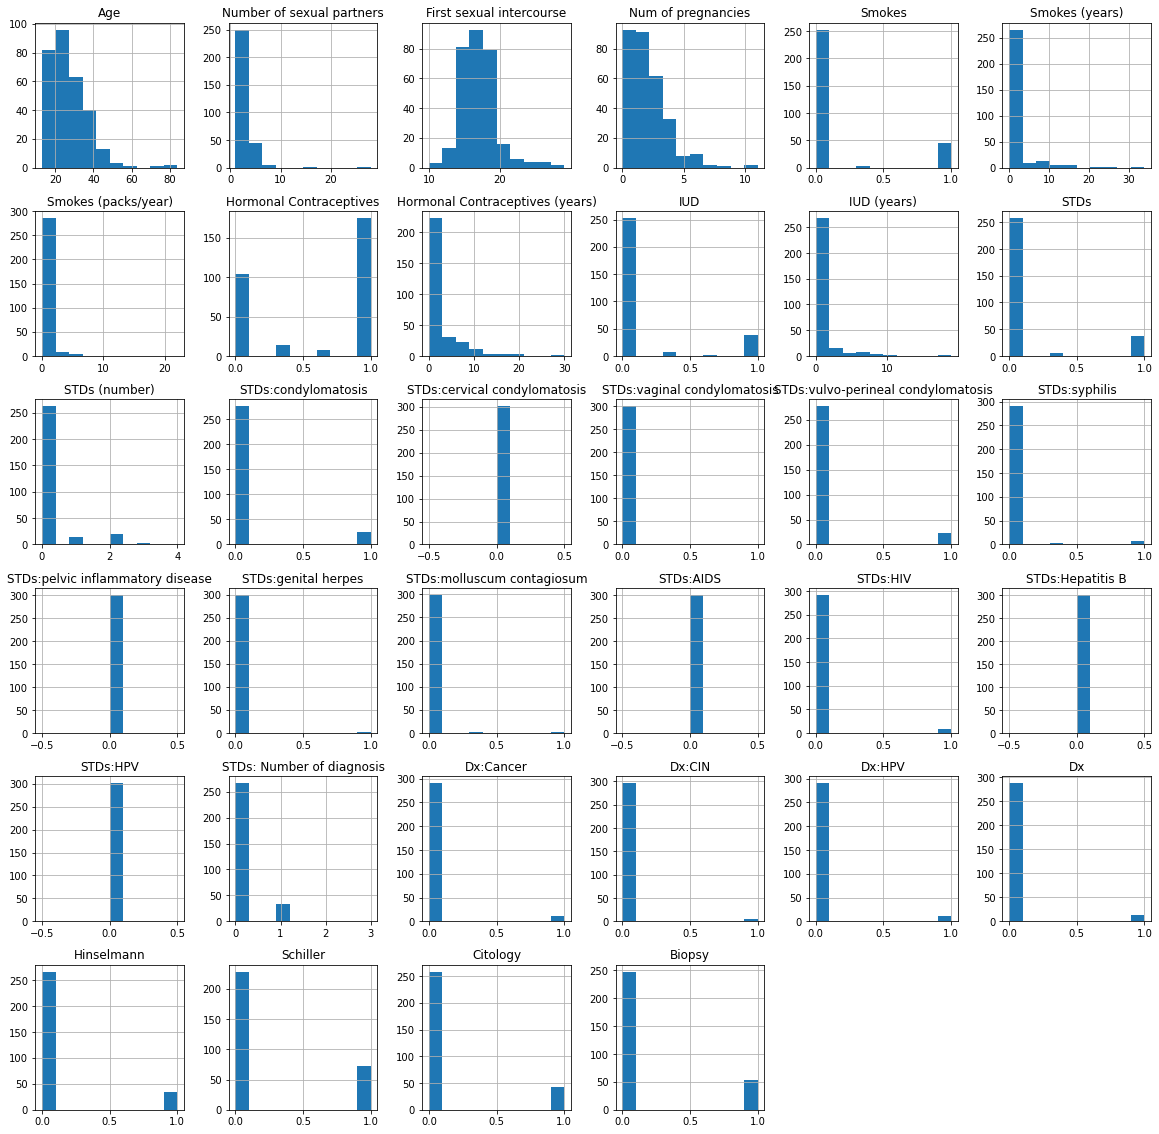

In [26]:
df.hist(figsize=(20,20))
plt.show()

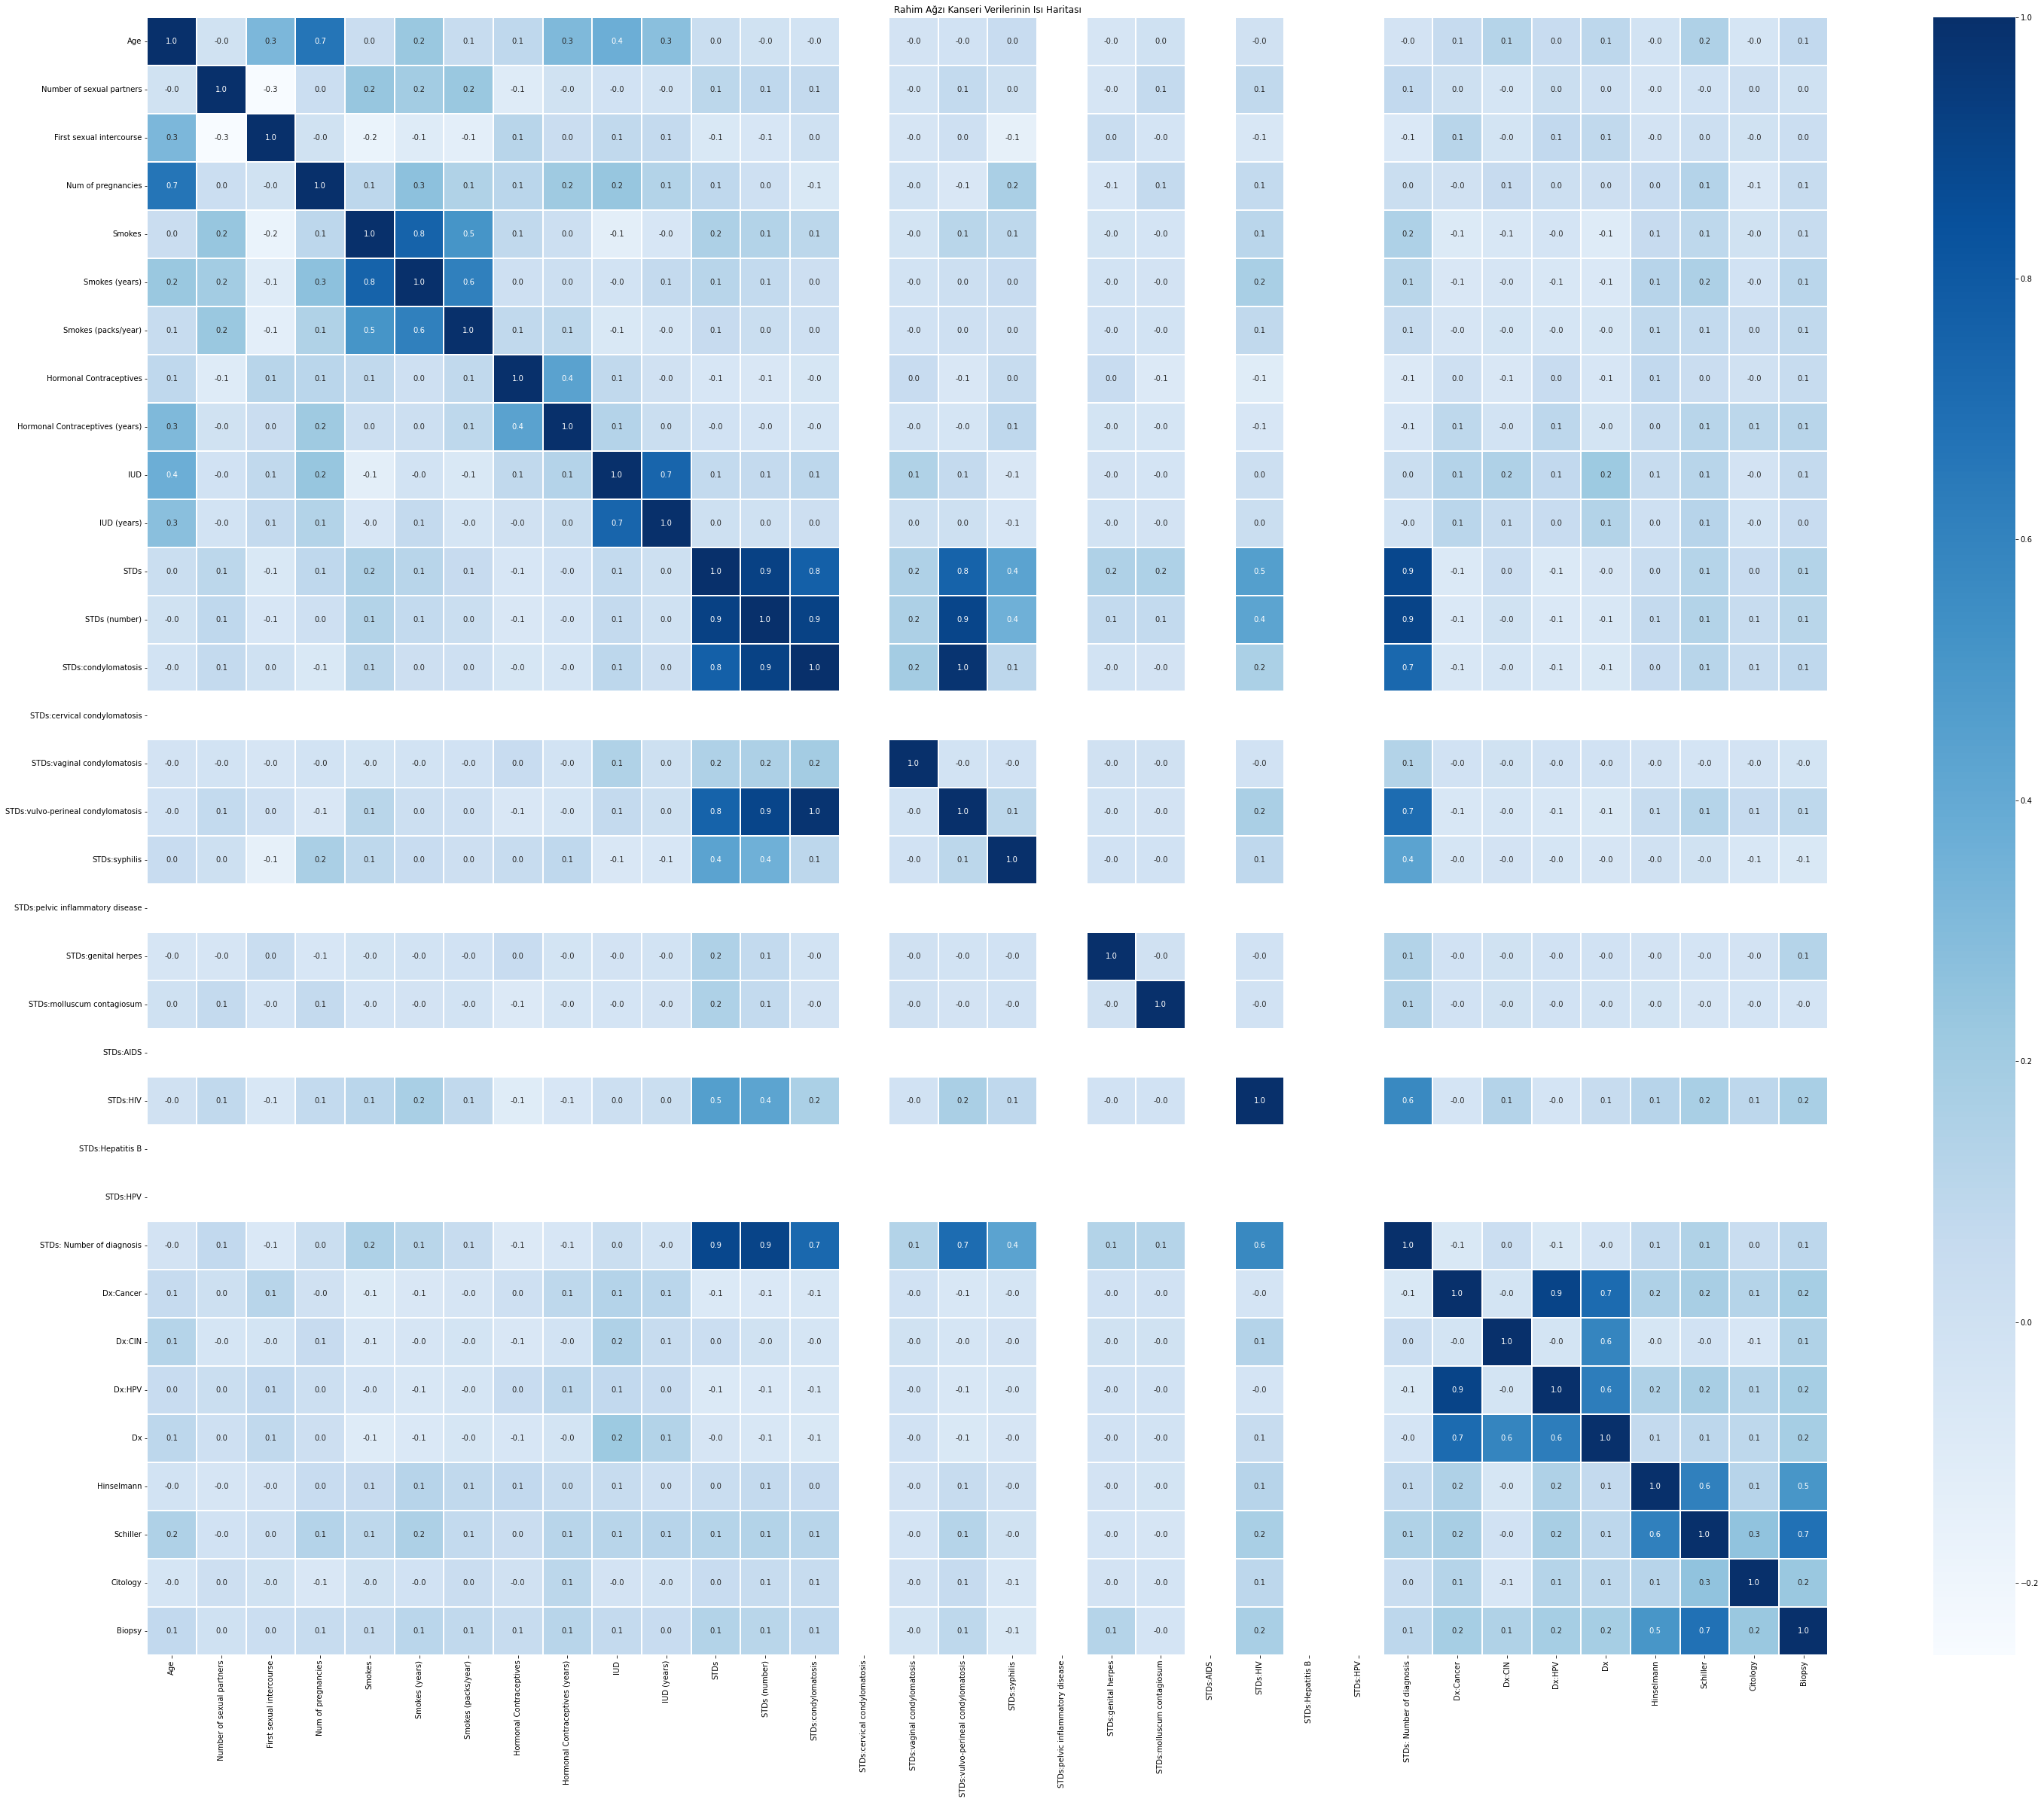

In [27]:
plt.figure(figsize=(50,40))
plt.title("Rahim Ağzı Kanseri Verilerinin Isı Haritası")
sns.heatmap(df.corr(),linewidths=2,annot=True, cbar=2, cmap='Blues',fmt=".1f")
plt.show()

In [28]:
data=pd.DataFrame(df[['Hinselmann','Schiller','Citology','Biopsy']])
data.head(10)

,Hinselmann,Schiller,Citology,Biopsy
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0
10,0.0,0.0,0.0,0.0


In [29]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, recall_score, accuracy_score, precision_score ,mean_squared_error,classification_report

In [30]:
from sklearn.feature_selection import RFE

In [31]:
def scores(actual, predicted):
    # # karışıklık matrisi
    # c_matrix = confusion_matrix(actual, predicted)
    # print(c_matrix)
    score = f1_score(actual, predicted)
    recall = recall_score(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted)
    print('Kesinlik：', precision * 100)
    print('Doğruluk:', accuracy * 100)
    print('Recall: ', recall * 100)
    print("F1: ", score * 100) 

In [32]:
data['count']=data['Hinselmann']+data['Schiller']+data['Citology']+data['Biopsy']

In [33]:
data['result']=np.where(data['count']>0,1,data['count'])

In [34]:
data['result'].value_counts()

0.0    200
1.0    101
Name: result, dtype: int64

In [35]:
#Aşağıdaki kod bloğunda sadece Biopsy bazında her bir makine öğrenmesi algoritmasının performansları aşağıdaki gibidir.

#df_X=df.drop(columns=['Biopsy'],axis=1)
df_Y=df['Biopsy']

#Random forest için Seçilen Özellik Dışındakilerin Çıkarılması
df_X=df.drop(columns=["Citology","STDs (number)","Dx:HPV","IUD (years)","Smokes","Smokes (years)","Hormonal Contraceptives","IUD","STDs","STDs:condylomatosis","STDs:cervical condylomatosis","STDs:vaginal condylomatosis","STDs:vulvo-perineal condylomatosis","STDs:syphilis","STDs:pelvic inflammatory disease","STDs:genital herpes","STDs:molluscum contagiosum","STDs:AIDS","STDs:HIV","STDs:Hepatitis B","STDs:HPV","STDs: Number of diagnosis","Dx:Cancer","Dx:CIN","Dx",'Biopsy'],axis=1)

#XGBoost için Seçilen Özellik Dışındakilerin Çıkarılması
#df_X=df.drop(columns=["Dx:HPV","Dx:Cancer","Number of sexual partners","Num of pregnancies","Smokes (years)","Smokes (packs/year)","Hormonal Contraceptives","Hormonal Contraceptives (years)","IUD","IUD (years)","STDs","STDs (number)","STDs:condylomatosis","STDs:cervical condylomatosis","STDs:vaginal condylomatosis","STDs:syphilis","STDs:pelvic inflammatory disease","STDs:genital herpes","STDs:molluscum contagiosum","STDs:AIDS","STDs:HIV","STDs:Hepatitis B","STDs:HPV","STDs: Number of diagnosis","Dx",'Biopsy'],axis=1)

#DecisionTree için Seçilen Özellik Dışındakilerin Çıkarılması
#df_X=df.drop(columns=["IUD (years)","Number of sexual partners","Smokes (years)","Smokes","Smokes (packs/year)","Hormonal Contraceptives","IUD","STDs","STDs:condylomatosis","STDs:cervical condylomatosis","STDs:vaginal condylomatosis","STDs:vulvo-perineal condylomatosis","STDs:vulvo-perineal condylomatosis","STDs:syphilis","STDs:pelvic inflammatory disease","STDs:genital herpes","STDs:molluscum contagiosum","STDs:AIDS","STDs:HIV","STDs:Hepatitis B","STDs:HPV","STDs: Number of diagnosis","Dx:Cancer","Dx:CIN","Dx:HPV","Dx",'Biopsy'],axis=1)

#SVC için Seçilen Özellik Dışındakilerin Çıkarılması
#df_X=df.drop(columns=["STDs:genital herpes","STDs:vaginal condylomatosis","STDs:HPV","Age","Number of sexual partners","First sexual intercourse","Num of pregnancies","Smokes","Smokes (years)","Smokes (packs/year)","Hormonal Contraceptives","Hormonal Contraceptives (years)","IUD","IUD (years)","STDs","STDs:condylomatosis","STDs:cervical condylomatosis","STDs:vulvo-perineal condylomatosis","STDs:vulvo-perineal condylomatosis","STDs:syphilis","STDs:pelvic inflammatory disease","STDs:molluscum contagiosum","STDs:AIDS","STDs:HIV","STDs:Hepatitis B","STDs: Number of diagnosis",'Biopsy'],axis=1)




#Aşağıdaki kod bloğunda 4 adet hedef değişkeninin toplamı şeklinde her bir makine öğrenmesi algoritmasının performansları aşağıdaki gibidir.



#df_X=df.drop(columns=['Hinselmann','Schiller','Citology','Biopsy'],axis=1)
#df_Y=data['result']


#Random forest için Seçilen Özellik Dışındakilerin Çıkarılması
#df_X=df.drop(columns=["Dx:HPV","Smokes","Smokes (years)","Hormonal Contraceptives","IUD","STDs","STDs:condylomatosis","STDs:cervical condylomatosis","STDs:vaginal condylomatosis","STDs:vulvo-perineal condylomatosis","STDs:syphilis","STDs:pelvic inflammatory disease","STDs:genital herpes","STDs:molluscum contagiosum","STDs:AIDS","STDs:HIV","STDs:Hepatitis B","STDs:HPV","STDs: Number of diagnosis","Dx:Cancer","Dx:CIN","Dx",'Hinselmann','Schiller','Citology','Biopsy'],axis=1)

#XGBoost için Seçilen Özellik Dışındakilerin Çıkarılması
#df_X=df.drop(columns=["Dx:CIN","First sexual intercourse","Num of pregnancies","Hormonal Contraceptives","Hormonal Contraceptives (years)","IUD","IUD (years)","STDs","STDs (number)","STDs:condylomatosis","STDs:cervical condylomatosis","STDs:vaginal condylomatosis","STDs:syphilis","STDs:pelvic inflammatory disease","STDs:genital herpes","STDs:molluscum contagiosum","STDs:AIDS","STDs:HIV","STDs:Hepatitis B","STDs:HPV","STDs: Number of diagnosis","Dx",'Hinselmann','Schiller','Citology','Biopsy'],axis=1)

#DecisionTree için Seçilen Özellik Dışındakilerin Çıkarılması
#df_X=df.drop(columns=["STDs:syphilis","Hormonal Contraceptives","STDs (number)","Dx:Cancer","Smokes","IUD","STDs","STDs:condylomatosis","STDs:cervical condylomatosis","STDs:vaginal condylomatosis","STDs:vulvo-perineal condylomatosis","STDs:vulvo-perineal condylomatosis","STDs:pelvic inflammatory disease","STDs:genital herpes","STDs:molluscum contagiosum","STDs:AIDS","STDs:HIV","STDs:Hepatitis B","STDs:HPV","STDs: Number of diagnosis","Dx:Cancer","Dx:CIN","Dx:HPV","Dx",'Hinselmann','Schiller','Citology','Biopsy'],axis=1)

#SVC için Seçilen Özellik Dışındakilerin Çıkarılması
#df_X=df.drop(columns=["STDs:HPV","STDs:Hepatitis B","Age","Number of sexual partners","First sexual intercourse","Num of pregnancies","Smokes","Smokes (years)","Smokes (packs/year)","Hormonal Contraceptives","Hormonal Contraceptives (years)","IUD","IUD (years)","STDs","STDs:cervical condylomatosis","STDs:vulvo-perineal condylomatosis","STDs:syphilis","STDs:pelvic inflammatory disease","STDs:molluscum contagiosum","STDs:AIDS","STDs:HIV","STDs: Number of diagnosis",'Hinselmann','Schiller','Citology','Biopsy'],axis=1)



In [36]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2)

In [37]:
X_train.shape,y_train.shape

((240, 8), (240,))

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
RandomForest=RandomForestClassifier(n_estimators=150,random_state=0)

In [40]:
rfe = RFE(estimator=RandomForest, n_features_to_select=8, step=1)
rfe.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(n_estimators=150, random_state=0),
    n_features_to_select=8)

In [41]:
for i, col in zip(range(X_train.shape[1]), X_train.columns):
    print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

Age selected=True rank=1
Number of sexual partners selected=True rank=1
First sexual intercourse selected=True rank=1
Num of pregnancies selected=True rank=1
Smokes (packs/year) selected=True rank=1
Hormonal Contraceptives (years) selected=True rank=1
Hinselmann selected=True rank=1
Schiller selected=True rank=1


In [42]:
predictions = rfe.predict(X_test)

In [43]:
scores(y_test,predictions)

Kesinlik： 52.94117647058824
Doğruluk: 80.32786885245902
Recall:  69.23076923076923
F1:  59.999999999999986


In [44]:
selected_features = DataFrame({'Feature':list(X_train.columns),'Ranking':rfe.ranking_})
selected_features.sort_values(by='Ranking')

,Feature,Ranking
0,Age,1
1,Number of sexual partners,1
2,First sexual intercourse,1
3,Num of pregnancies,1
4,Smokes (packs/year),1
5,Hormonal Contraceptives (years),1
6,Hinselmann,1
7,Schiller,1


In [45]:
rf=RandomForestClassifier(n_estimators=150,random_state=0)

In [46]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150, random_state=0)

In [47]:
y_pred2=rf.predict(X_test)
scores(y_test, y_pred2)

Kesinlik： 52.94117647058824
Doğruluk: 80.32786885245902
Recall:  69.23076923076923
F1:  59.999999999999986


In [48]:
import matplotlib.pyplot as plt

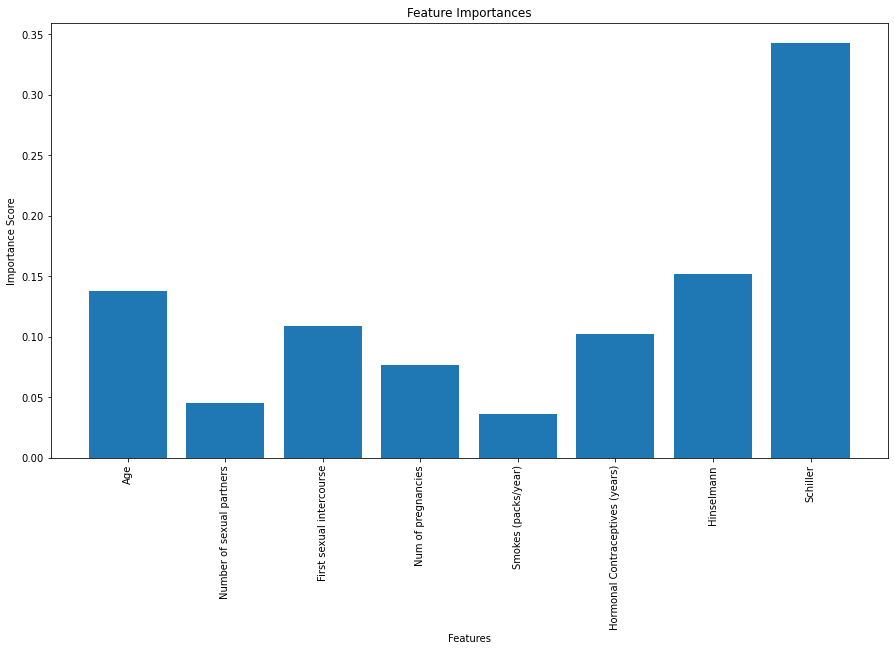

In [49]:
feature_importances = rf.feature_importances_
plt.figure(figsize=(15, 8))
plt.bar(X_train.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

In [50]:
from sklearn import metrics

In [51]:
metrics.confusion_matrix(y_test, y_pred2)

array([[40,  8],
       [ 4,  9]], dtype=int64)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
display(X_train.shape)
X_test.shape

(240, 8)

(61, 8)

In [54]:
y_train.value_counts()

0.0    199
1.0     41
Name: Biopsy, dtype: int64

In [55]:
y_test.value_counts()

0.0    48
1.0    13
Name: Biopsy, dtype: int64

In [56]:
rfe = RFE(estimator=XGBClassifier(), n_features_to_select=8, step=1)
rfe.fit(X_train,y_train)

RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, early_stopping_rounds=None,
                            enable_categorical=False, eval_metric=None,
                            feature_types=None, gamma=None, gpu_id=None,
                            grow_policy=None, importance_type=None,
                            interaction_constraints=None, learning_rate=None,
                            max_bin=None, max_cat_threshold=None,
                            max_cat_to_onehot=None, max_delta_step=None,
                            max_depth=None, max_leaves=None,
                            min_child_weight=None, missing=nan,
                            monotone_constraints=None, n_estimators=100,
                            n_jobs=None, num_parallel_tree=None, predictor=None,
                            random_state=None, ...),
    n_fea

In [57]:
for i, col in zip(range(X_train.shape[1]), X_train.columns):
    print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

Age selected=True rank=1
Number of sexual partners selected=True rank=1
First sexual intercourse selected=True rank=1
Num of pregnancies selected=True rank=1
Smokes (packs/year) selected=True rank=1
Hormonal Contraceptives (years) selected=True rank=1
Hinselmann selected=True rank=1
Schiller selected=True rank=1


In [58]:
xgb_cls = xgb.XGBClassifier()

In [59]:
xgb_cls.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [60]:
preds = xgb_cls.predict(X_test)

In [61]:
#XGBoost
scores(y_test, preds)

Kesinlik： 47.05882352941176
Doğruluk: 77.04918032786885
Recall:  61.53846153846154
F1:  53.333333333333336


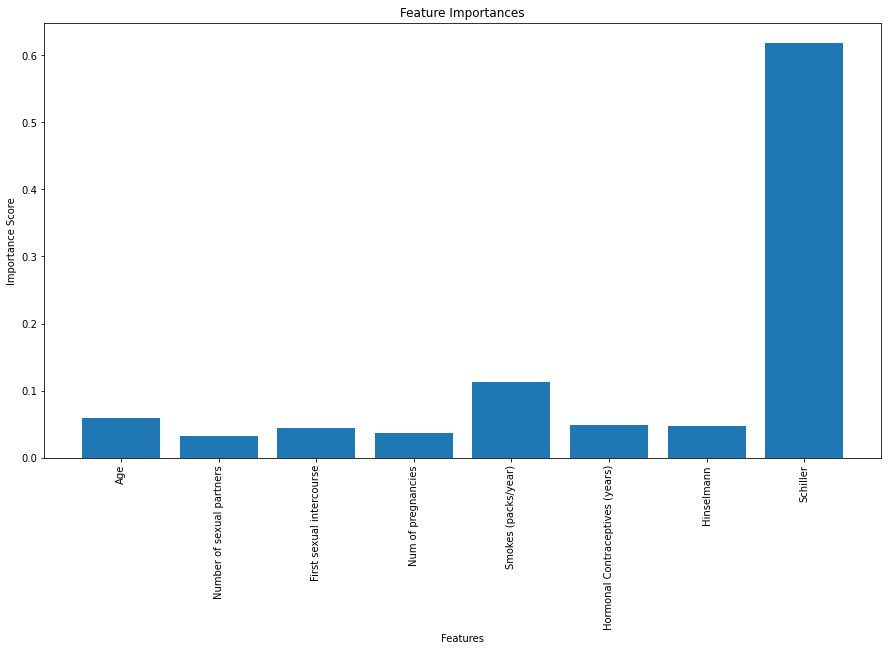

In [62]:
feature_importances = xgb_cls.feature_importances_
plt.figure(figsize=(15, 8))
plt.bar(X_train.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

In [63]:
from sklearn.tree import DecisionTreeClassifier


In [64]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=8, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=8)

In [65]:
for i, col in zip(range(X_train.shape[1]), X_train.columns):
    print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

Age selected=True rank=1
Number of sexual partners selected=True rank=1
First sexual intercourse selected=True rank=1
Num of pregnancies selected=True rank=1
Smokes (packs/year) selected=True rank=1
Hormonal Contraceptives (years) selected=True rank=1
Hinselmann selected=True rank=1
Schiller selected=True rank=1


In [66]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
preds2 = tree.predict(X_test)

In [68]:
scores(y_test, preds2)

Kesinlik： 37.5
Doğruluk: 72.1311475409836
Recall:  46.15384615384615
F1:  41.37931034482759


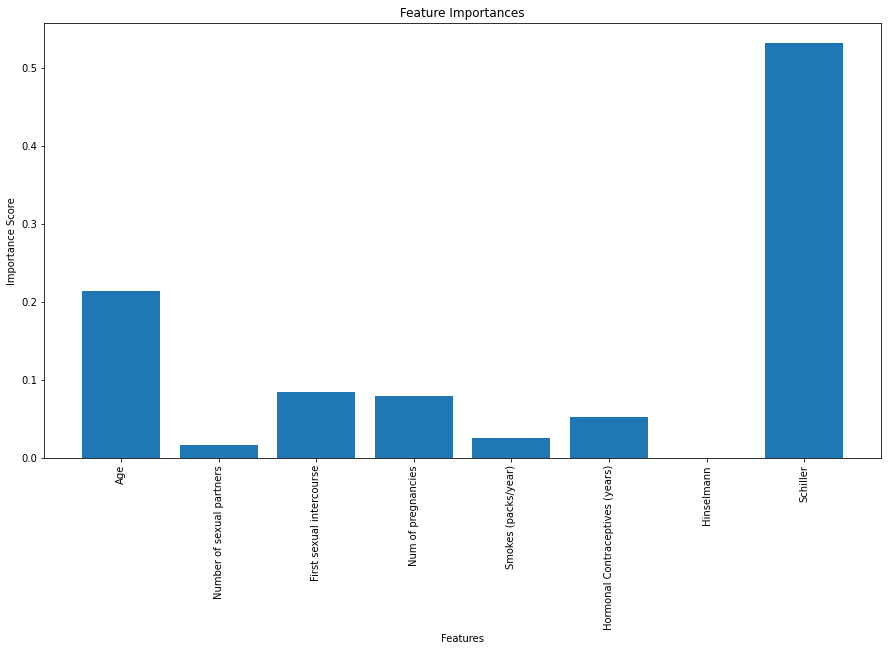

In [69]:
feature_importances = tree.feature_importances_
plt.figure(figsize=(15, 8))
plt.bar(X_train.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

In [70]:
from sklearn.svm import SVC

In [71]:
rfe = RFE(estimator=SVC(kernel='linear'), n_features_to_select=8, step=1)
rfe.fit(X_train,y_train)

RFE(estimator=SVC(kernel='linear'), n_features_to_select=8)

In [72]:
for i, col in zip(range(X_train.shape[1]), X_train.columns):
    print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

Age selected=True rank=1
Number of sexual partners selected=True rank=1
First sexual intercourse selected=True rank=1
Num of pregnancies selected=True rank=1
Smokes (packs/year) selected=True rank=1
Hormonal Contraceptives (years) selected=True rank=1
Hinselmann selected=True rank=1
Schiller selected=True rank=1


In [73]:
classifier = SVC(kernel='linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [74]:
y_pred = classifier.predict(X_test)

In [75]:
scores(y_test, y_pred)

Kesinlik： 52.38095238095239
Doğruluk: 80.32786885245902
Recall:  84.61538461538461
F1:  64.70588235294117


In [76]:
feature_importances = classifier.feature_importances_
plt.figure(figsize=(15, 8))
plt.bar(X_train.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

AttributeError: 'SVC' object has no attribute 'feature_importances_'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knc_cls = KNeighborsClassifier(n_neighbors=5, algorithm ='auto')

In [ ]:
knc_cls.fit(X_train,y_train)

In [ ]:
y_pred = knc_cls.predict(X_test)

In [ ]:
scores(y_test, y_pred)